In [37]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from IPython.display import display

# Data Preparation

In [43]:
echo = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/echo_allgenres_nooutliers.csv')
display(echo['genre_top'].value_counts())
display(echo.shape)
display(echo.head())

Rock                   3810
Electronic             2088
Hip-Hop                 861
Folk                    856
Pop                     344
Old-Time / Historic     316
Jazz                    222
Classical               213
International           128
Instrumental             79
Blues                    65
Experimental             17
Name: genre_top, dtype: int64

(8999, 12)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,duration,bit_rate,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,0.576661,165.922,168,256,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,0.269240,126.957,237,256,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,0.621661,100.260,206,256,Hip-Hop
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,0.963590,111.562,161,192,Pop
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,0.894072,114.290,207,256,Hip-Hop


In [44]:
happiness = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/song_happiness_labels.csv')
happiness.head()

,track_id,valence
0,2,happy
1,3,sad
2,5,happy
3,10,happy
4,134,happy


In [50]:
echo.drop('valence', axis=1, inplace=True)
echo = echo.merge(happiness, on='track_id')
display(echo['valence'].value_counts())
display(echo.head())

sad      5341
happy    3658
Name: valence, dtype: int64

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,duration,bit_rate,genre_top,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,168,256,Hip-Hop,happy
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,237,256,Hip-Hop,sad
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,206,256,Hip-Hop,happy
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,161,192,Pop,happy
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,207,256,Hip-Hop,happy


# Data Partitioning

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [53]:
class_name = 'valence'
attributes = [col for col in echo.columns if col != class_name]
X = echo[attributes].values
y = echo[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [9]:
X_train.shape

(5700, 10)

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9938600081866558
F1-score [0.99610693 0.98547919]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [13]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9948159668221876,
  'recall': 0.9974012474012474,
  'f1-score': 0.9961069296651959,
  'support': 1924},
 '1': {'precision': 0.9902723735408561,
  'recall': 0.9807321772639692,
  'f1-score': 0.9854791868344628,
  'support': 519},
 'accuracy': 0.9938600081866558,
 'macro avg': {'precision': 0.9925441701815219,
  'recall': 0.9890667123326082,
  'f1-score': 0.9907930582498293,
  'support': 2443},
 'weighted avg': {'precision': 0.9938507089781389,
  'recall': 0.9938600081866558,
  'f1-score': 0.9938491324776599,
  'support': 2443}}

In [14]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9948159668221876, "recall": 0.9974012474012474, "f1-score": 0.9961069296651959, "support": 1924}, "1": {"precision": 0.9902723735408561, "recall": 0.9807321772639692, "f1-score": 0.9854791868344628, "support": 519}, "accuracy": 0.9938600081866558, "macro avg": {"precision": 0.9925441701815219, "recall": 0.9890667123326082, "f1-score": 0.9907930582498293, "support": 2443}, "weighted avg": {"precision": 0.9938507089781389, "recall": 0.9938600081866558, "f1-score": 0.9938491324776599, "support": 2443}}'

In [15]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.9948159668221876,
  'recall': 0.9974012474012474,
  'f1-score': 0.9961069296651959,
  'support': 1924},
 '1': {'precision': 0.9902723735408561,
  'recall': 0.9807321772639692,
  'f1-score': 0.9854791868344628,
  'support': 519},
 'accuracy': 0.9938600081866558,
 'macro avg': {'precision': 0.9925441701815219,
  'recall': 0.9890667123326082,
  'f1-score': 0.9907930582498293,
  'support': 2443},
 'weighted avg': {'precision': 0.9938507089781389,
  'recall': 0.9938600081866558,
  'f1-score': 0.9938491324776599,
  'support': 2443}}

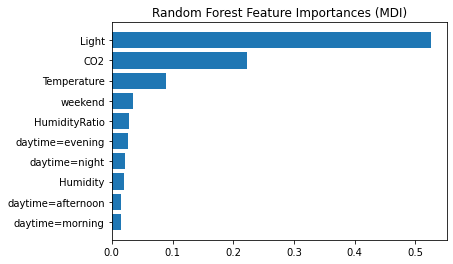

In [17]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [18]:
from sklearn.inspection import permutation_importance

In [19]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

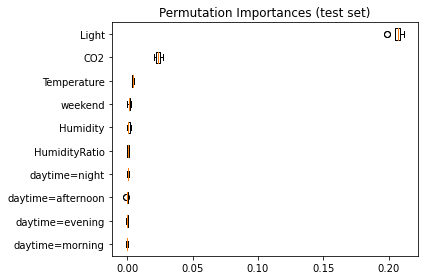

In [21]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [22]:
import pydotplus
from sklearn import tree
from IPython.display import Image

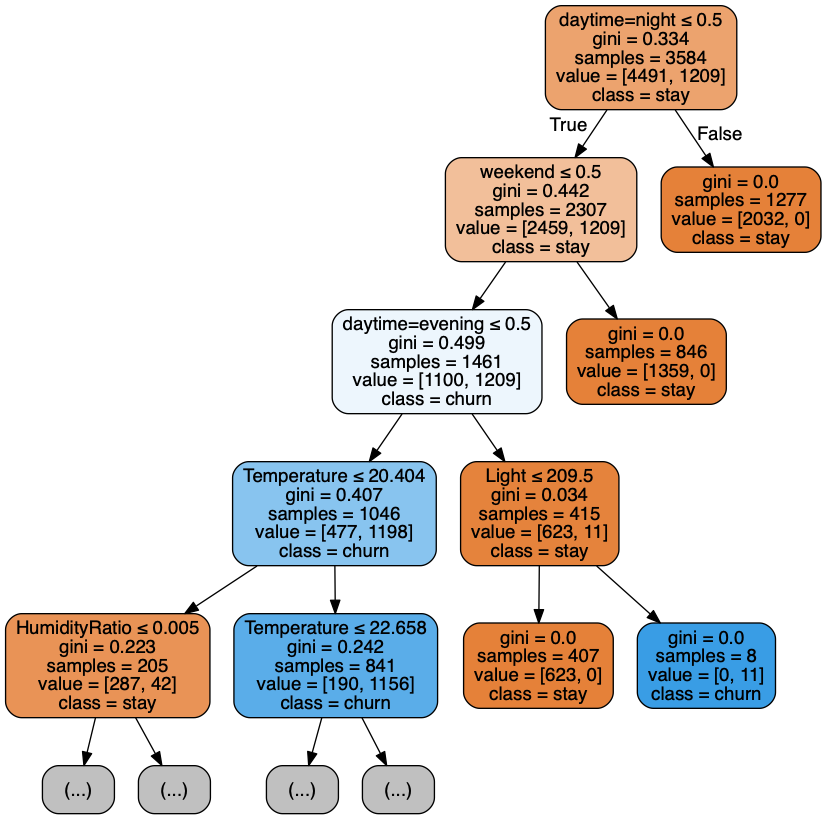

In [24]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

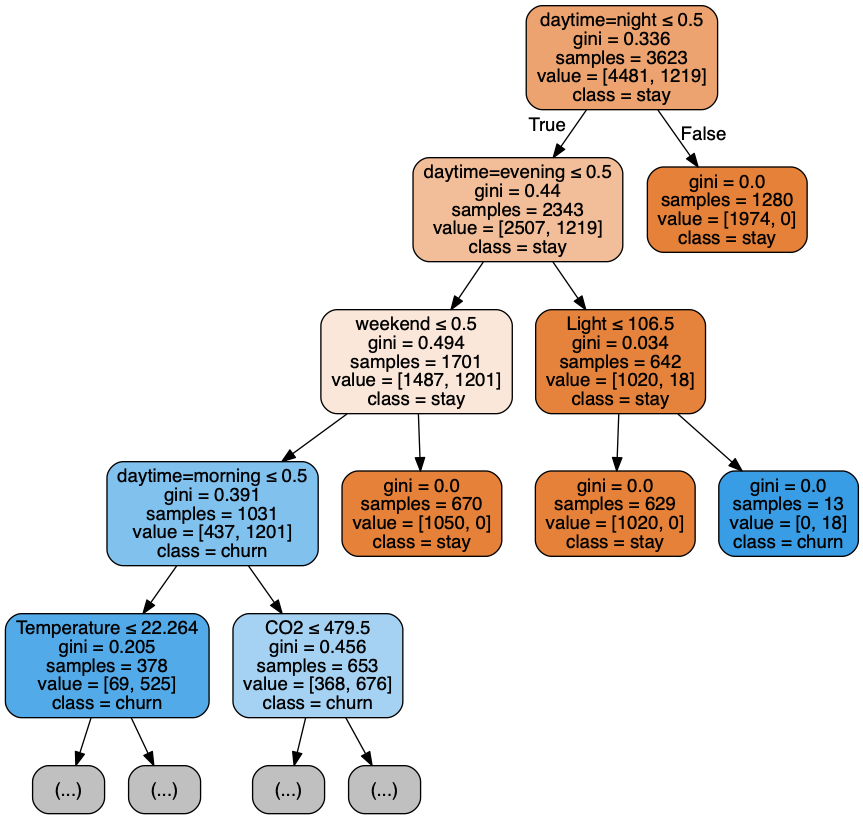

In [26]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=attributes, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [27]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.99584631 0.98452611]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [28]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9938600081866558
F1-score [0.99610693 0.98547919]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [29]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373695 0.9772296 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.961 +/- 0.044


### Tuning the hyper-parameters

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [33]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9922226770364306
F1-score [0.99506109 0.98171319]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [34]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9930413426115432
F1-score [0.99557637 0.98370086]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [35]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 2, 'min_samples_leaf': 50, 'max_depth': 16}

# Bagging

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [37]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9918133442488744
F1-score [0.99481597 0.98054475]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [38]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897666803110929
F1-score [0.99347088 0.97634816]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [39]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.995842   0.98458574]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Boosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [41]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9950880065493246
F1-score [0.99688474 0.98839458]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           1.00      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       1.00      1.00      1.00      2443



In [42]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9930413426115432
F1-score [0.99558556 0.98357488]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443

